In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import ImageGrid
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD, Adam

ModuleNotFoundError: No module named 'sklearn'

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array

In [16]:
pic_size = 48
#base_path = "../input/face-expression-recognition-dataset/images/"
base_path = "F:\projects pratice\archive 2\images\images"

In [61]:
#for expression in os.listdir(base_path + "train" ):
    #print(str(len(os.listdir(base_path + "train" + expression)))+" "+expression+" images")

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import glob as gb
import os

In [73]:
train_data="F:\\projects pratice\\archive 2\\images\\images\\train"
test_data="F:\\projects pratice\\archive 2\\images\\images\\validation"

In [74]:
pic_size = 48

In [75]:
code={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
def code_func(n):
  for i , j in code.items() :
    if i==n :
      return j

In [76]:
Size=100
X_train=[]
y_train=[]
X_test=[]
y_test=[]


In [77]:
for folder in os.listdir(path=train_data):
  files =gb.glob(pathname=str(train_data +"//"+folder+"/*.jpg"))
  for file in files :
    image=cv.imread(file)
    X_train.append(list(cv.resize(image,(Size,Size))))
    y_train.append(code_func(folder))

In [78]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [79]:
for folder in os.listdir(path=test_data):
  files =gb.glob(pathname=str(test_data +"\\"+folder+"\*.jpg"))
  for file in files :
    image=cv.imread(file)
    X_test.append(list(cv.resize(image,(Size,Size))))
    y_test.append(code_func(folder))

In [80]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [81]:
X_train.shape

(28821, 100, 100, 3)

In [82]:
X_test.shape

(7066, 100, 100, 3)

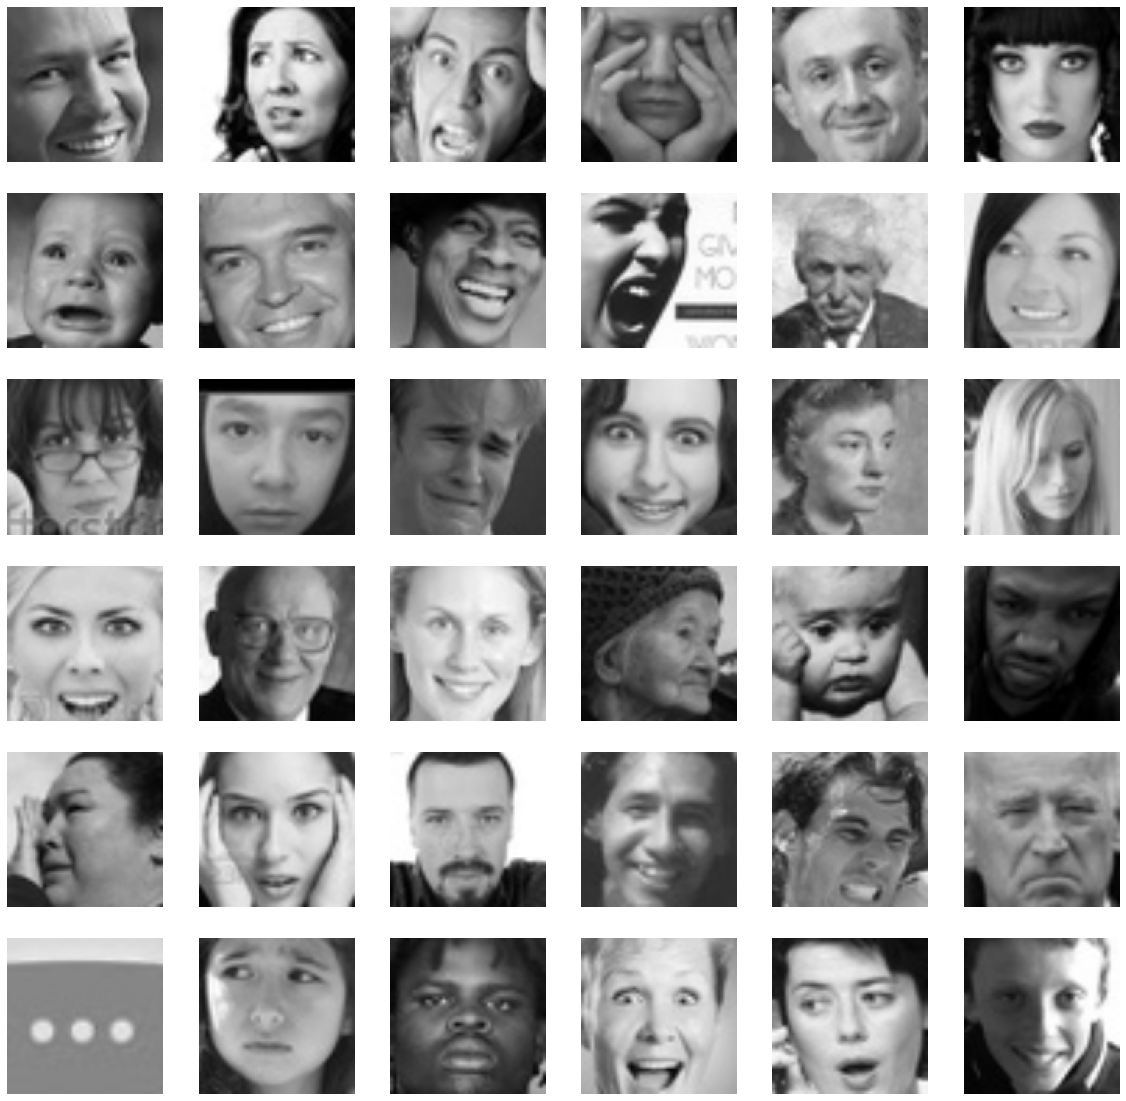

In [83]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(code_func(y_train[i]))

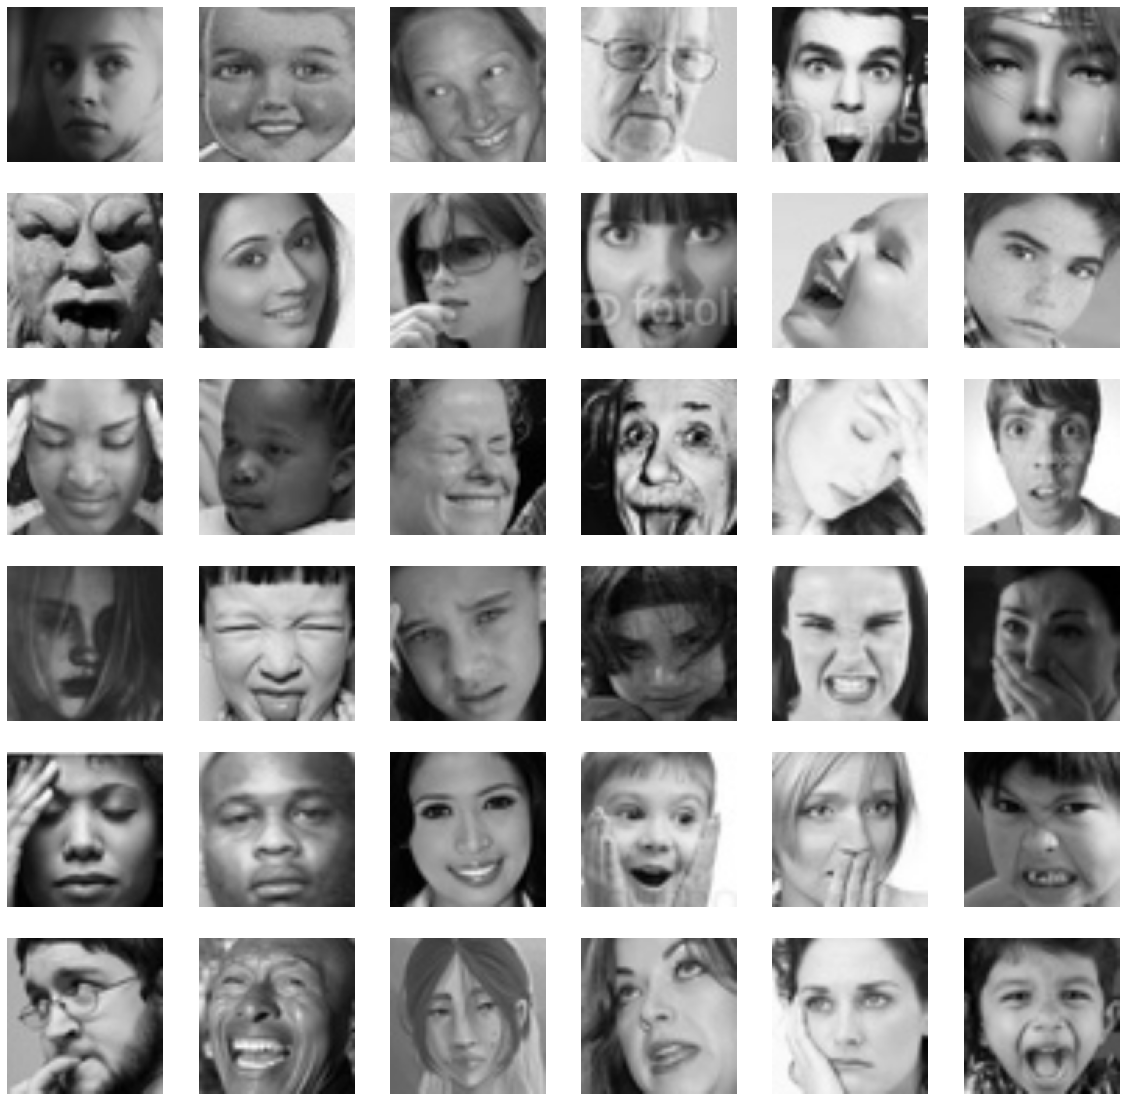

In [84]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(code_func(y_test[i]))


In [91]:
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())


#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      

In [95]:
from keras.preprocessing.image import ImageDataGenerator

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_gen = datagen_train.flow_from_directory(train_data,
                                              target_size = (pic_size,pic_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


val_gen = datagen_val.flow_from_directory(test_data,
                                              target_size = (pic_size,pic_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [97]:
#train the model
# number of epochs to train the NN
epochs = 5

from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=epochs,
                                validation_data = val_gen,
                                validation_steps = val_gen.n//val_gen.batch_size,
                                callbacks=callbacks_list
                                )


Epoch 1/5
225/225 [==============================] - 1229s 5s/step - loss: 1.8081 - accuracy: 0.3062 - val_loss: 1.7144 - val_accuracy: 0.3237
Epoch 2/5
225/225 [==============================] - 1219s 5s/step - loss: 1.7156 - accuracy: 0.3418 - val_loss: 1.7226 - val_accuracy: 0.3483
Epoch 3/5
225/225 [==============================] - 1213s 5s/step - loss: 1.6474 - accuracy: 0.3676 - val_loss: 1.5975 - val_accuracy: 0.3862
Epoch 4/5
225/225 [==============================] - 1219s 5s/step - loss: 1.5857 - accuracy: 0.3907 - val_loss: 1.5924 - val_accuracy: 0.3966
Epoch 5/5
225/225 [==============================] - 1211s 5s/step - loss: 1.5352 - accuracy: 0.4120 - val_loss: 1.6488 - val_accuracy: 0.3915


In [98]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

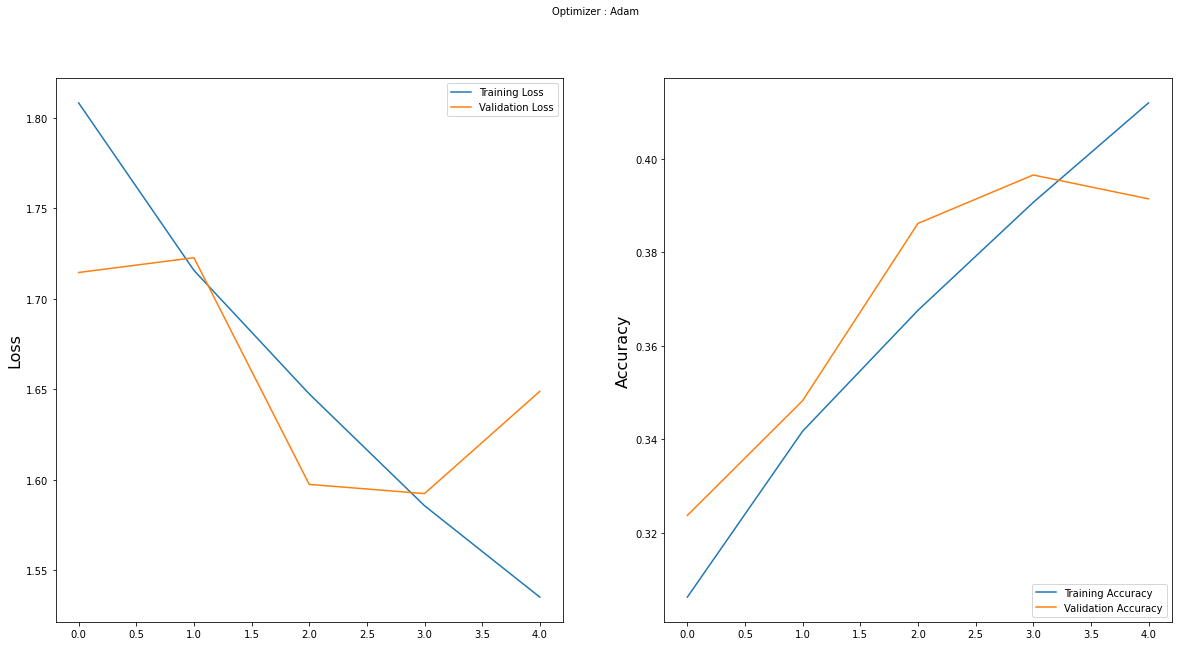

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()